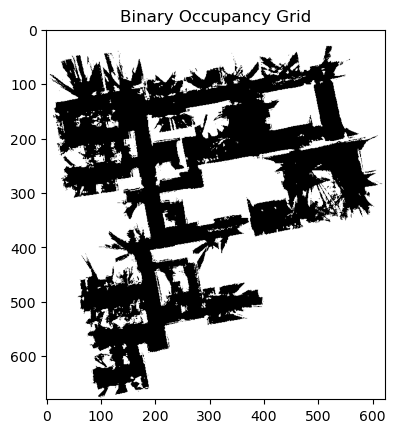

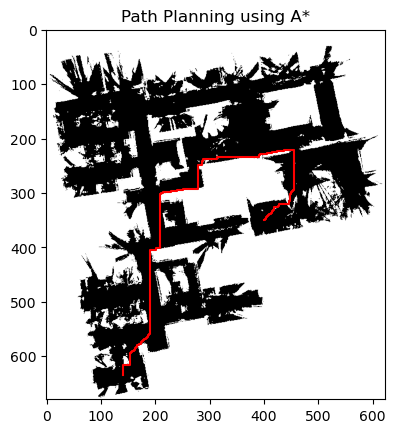

Path length: 915.0


In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import heapq

def recover_path(start, goal, predecessors):
    """
    Backtracks from the goal to the start using the predecessors dictionary to reconstruct the path.
    
    Args:
        start (tuple): Starting coordinates (row, col).
        goal (tuple): Goal coordinates (row, col).
        predecessors (dict): Dictionary mapping each node to its predecessor.
    
    Returns:
        list: The reconstructed path from start to goal.
    """
    path = [goal]
    current = goal
    while current != start:
        current = predecessors[current]
        path.append(current)
    return list(reversed(path))

def a_star_search(nodes, start, goal, get_neighbors, cost_function, heuristic):
    """
    Implements the A* search algorithm to find the shortest path between start and goal.

    Args:
        nodes (list): List of valid grid positions.
        start (tuple): Starting position (row, col).
        goal (tuple): Goal position (row, col).
        get_neighbors (function): Function returning valid neighbors of a node.
        cost_function (function): Function computing the cost between two nodes.
        heuristic (function): Heuristic function estimating cost from a node to the goal.
    
    Returns:
        list: The shortest path from start to goal.
    """
    cost_to_node = {v: float('inf') for v in nodes}  # Tracks actual cost from start to each node
    cost_to_node[start] = 0  

    predecessors = {v: None for v in nodes}  # Keeps track of the optimal predecessor for each node

    estimated_total_cost = {v: float('inf') for v in nodes}  # Estimated total cost (g + h)
    estimated_total_cost[start] = heuristic(start, goal)

    priority_queue = [(estimated_total_cost[start], start)]  # Min-heap priority queue

    while priority_queue:
        _, current = heapq.heappop(priority_queue)

        if current == goal:
            return recover_path(start, goal, predecessors)

        for neighbor in get_neighbors(current):
            new_cost = cost_to_node[current] + cost_function(current, neighbor)
            if new_cost < cost_to_node[neighbor]:  
                cost_to_node[neighbor] = new_cost
                predecessors[neighbor] = current
                estimated_total_cost[neighbor] = new_cost + heuristic(neighbor, goal)
                heapq.heappush(priority_queue, (estimated_total_cost[neighbor], neighbor))

def get_neighbors(cell, grid):
    """
    Retrieves valid neighbors for a given cell in the occupancy grid.

    Args:
        cell (tuple): The current grid position (row, col).
        grid (numpy array): Binary occupancy grid (1 = free, 0 = obstacle).
    
    Returns:
        list: List of valid neighboring positions.
    """
    r, c = cell
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
    neighbors = []

    for dr, dc in moves:
        neighbor = (r + dr, c + dc)
        if 0 <= neighbor[0] < grid.shape[0] and 0 <= neighbor[1] < grid.shape[1] and grid[neighbor] == 1:
            neighbors.append(neighbor)
    
    return neighbors

def euclidean_distance(cell1, cell2):
    """
    Computes the Euclidean distance between two grid cells.

    Args:
        cell1 (tuple): First grid position (row, col).
        cell2 (tuple): Second grid position (row, col).
    
    Returns:
        float: The Euclidean distance between the two points.
    """
    r1, c1 = cell1
    r2, c2 = cell2
    return math.sqrt((r1 - r2) ** 2 + (c1 - c2) ** 2)

def main():
    """
    Main function that:
    - Loads an occupancy grid from an image
    - Converts it to a binary map
    - Defines start and goal positions
    - Runs the A* algorithm to find the shortest path
    - Plots the result
    """
    # Load the occupancy map from an image file
    img = io.imread('occupancy_map.png')

    # Convert the grayscale image to a binary grid (thresholding at 128)
    grid = (img > 128).astype(int)

    # Display the binary occupancy grid
    plt.imshow(grid, cmap='Greys')
    plt.title('Binary Occupancy Grid')
    plt.show()

    # Define start and goal locations
    start = (635, 140)
    goal = (350, 400)

    # Run the A* algorithm
    path = a_star_search(
        nodes=list(zip(*np.where(grid))),  # Extract valid positions
        start=start,
        goal=goal,
        get_neighbors=lambda v: get_neighbors(v, grid),
        cost_function=euclidean_distance,
        heuristic=euclidean_distance
    )

    # Plot the result
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='Greys')
    ax.plot([p[1] for p in path], [p[0] for p in path], color='red')
    plt.title('Path Planning using A*')
    plt.show()

    # Compute and display the total path length
    path_length = sum(euclidean_distance(path[i], path[i+1]) for i in range(len(path)-1))
    print(f"Path length: {path_length}")

if __name__ == '__main__':
    try:
        main()
    except Exception as e:
        print(f"Error: {e}")
